# SN Different Roll Periods
* Functional version of the signal to noise for a different point.
* Exploring the S/N for different windows. This uses the functional version of the sn for single point

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('seaborn-darkgrid')
import xarray as xr
import pandas as pd
from dask.diagnostics import ProgressBar
import matplotlib as mpl
from importlib import reload
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from enum import Enum
from dask.diagnostics import ProgressBar
import sys, matplotlib, os
# Contains path information
sys.path.append('../')

import constants
sys.path.append(constants.MODULE_DIR)

import signal_to_noise as sn
# Custom xarray classes that addes different method.
import xarray_class_accessors as xca

# Custom plots for signal to noise functions.
import sn_plotting as sn_plot

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
variable = 'tas'
model = 'MPIESM11'

In [3]:
ROOT_DIR = os.path.join(constants.LONGRUNMIP_DIR, variable,'regrid_retimestamped')
ROOT_DIR

'/g/data/w40/ab2313/PhD/longrunmip/tas/regrid_retimestamped'

In [4]:
IMG_DIR = constants.IMAGE_SAVE_DIR_TOP_LEVEL
IMG_DIR

'/home/563/ab2313/gdata/images/PhD/top_level'

In [5]:
notebook_number ='01'

# Calculation

## Loading Data 
In this notebook everythning need to be run together to check the affect of having different roll period.s

In [6]:
chunks = {'lat':48/2,'lon':96/2,'time':-1}

In [7]:
# Open Data
path_control = os.path.join(ROOT_DIR, 'tas_mon_MPIESM12_control_1237_g025.nc')
control = xr.open_dataset(path_control,use_cftime = True, chunks = chunks).tas

path_abrupt4 = os.path.join(ROOT_DIR, 'tas_ann_MPIESM11_abrupt4x_4459_g025.nc')
abrupt = xr.open_dataset(path_abrupt4,use_cftime = True, chunks = chunks).tas
abrupt

<xarray.DataArray 'tas' (time: 4459, lat: 72, lon: 144)>
dask.array<open_dataset-db91de50e238fb4b5043bc84dff75325tas, shape=(4459, 72, 144), dtype=float32, chunksize=(4459, 24, 48), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * time     (time) object 0001-12-31 00:00:00 ... 4459-12-31 00:00:00
Attributes:
    long_name:  Near-Surface Air Temperature; usually on 2m
    units:      K
    code:       167
    table:      128

In [8]:
### Control
# Anomalies
control_anom = control.clima.anomalies()

# Space mean
control_anom_smean = control_anom.clima.space_mean()

### Abrupt
# Anomalies
abrupt_anom = abrupt.clima.anomalies(historical = control)

# Space mean
abrupt_anom_smean = abrupt_anom.clima.space_mean()
abrupt_anom_smean

<xarray.DataArray 'tas' (time: 4459)>
dask.array<truediv, shape=(4459,), dtype=float64, chunksize=(4459,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-12-31 00:00:00 ... 4459-12-31 00:00:00

In [9]:
# Computing these values before hand to speed up calculations
abrupt_anom_smean = abrupt_anom_smean.compute()
control_anom_smean = control_anom_smean.compute()

In [10]:
reload(sn)
(da_stable, da_increasing, da_decreasing, da_sn, da_sn_stable, da_sn_increasing, da_sn_decreasing, 
                control_smean_lbound, control_smean_ubound) =\
     sn.global_mean_sn(abrupt_anom_smean, control_anom_smean, window = 61, return_all=1)

In [11]:
da_increasing = da_increasing.compute()
da_stable = da_stable.compute()

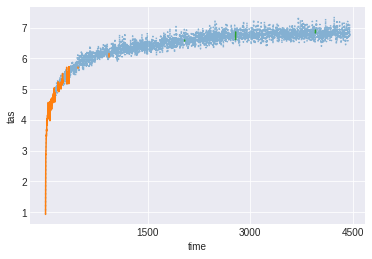

In [12]:
abrupt_anom_smean.plot(alpha = 0.5, linestyle=':')
da_increasing.plot()
da_decreasing.plot()

In [22]:
da_sn

<xarray.Dataset>
Dimensions:          (time: 4399)
Coordinates:
  * time             (time) object 0001-12-31 00:00:00 ... 4399-12-31 00:00:00
Data variables:
    signal_to_noise  (time) float64 5.023 6.001 7.068 ... 0.6268 0.4216 0.2499
    lower_bound      float64 -1.488
    upper_bound      float64 1.886

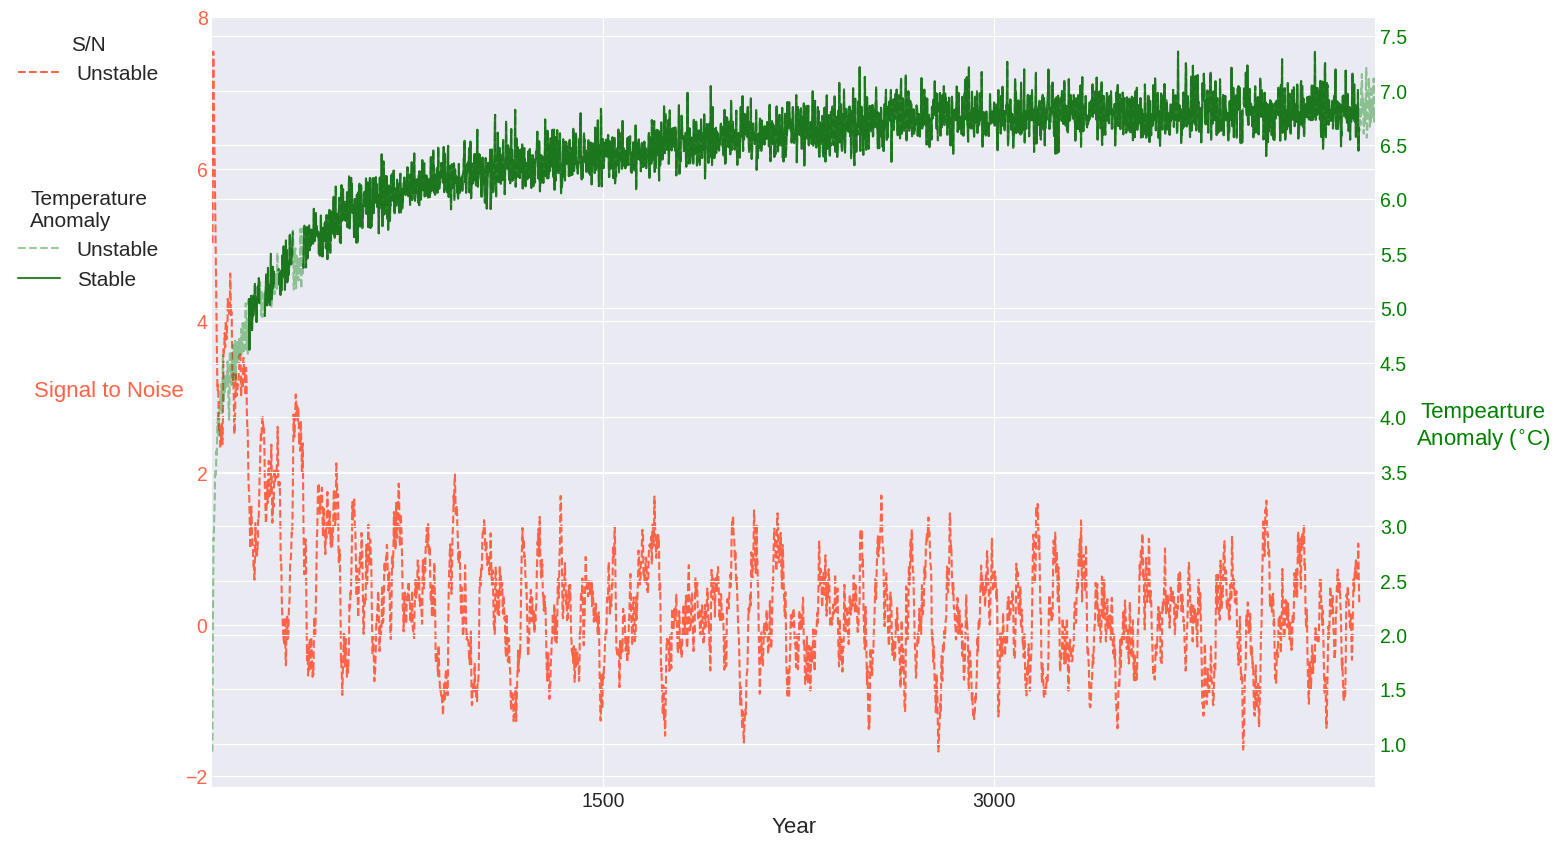

In [29]:
fig = plt.figure(figsize=  (15,10))
ax = fig.add_subplot(111)
plt.style.use('seaborn-darkgrid')
sn_plot.temperature_vs_sn_plot(ax,  da_sn['signal_to_noise'], abrupt_anom_smean,
                      temp_highlight = da_stable, 
                      sn_highlight = da_sn_stable)


fig.savefig(f'{IMG_DIR}/{notebook_number}_{model}_global_sn_temp_anomaly.png', bbox_inches='tight', dpi=500)

# Multi-window

We now want to test the effect of multiple-windows.

In [36]:
unstable_sn_multi_window_da , stable_sn_multi_window_da =\
                sn.sn_multi_window(abrupt_anom_smean,control_anom_smean, end_window=500, step_window=2)

Starting window loop from 21 to 500 with step size of 2
21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259, 261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285, 287, 289, 291, 293, 295, 297, 299, 301, 303, 305, 307, 309, 311, 313, 315, 317, 319, 321, 323, 325, 327, 329, 331, 333, 335, 337, 339, 341, 343, 345, 347, 349, 351, 353, 355, 357, 359, 361, 363, 365, 367, 369, 371, 373, 375, 377, 379, 381, 383, 385, 387, 389, 391, 393, 395, 397, 399, 401, 403, 405, 407, 409, 411, 413,

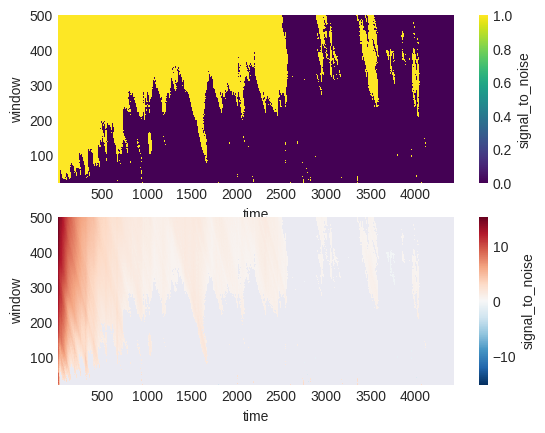

In [37]:
fig, (ax1, ax2) = plt.subplots(2,1)
stable_sn_multi_window_da['signal_to_noise'].plot(ax=ax1)
unstable_sn_multi_window_da['signal_to_noise'].plot(ax=ax2)

{'height': 15, 'width': 7, 'hspace': 0.3, 'vmin': -8, 'vmax': 8, 'step': 1, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x7f8a086a5b50>, 'line_color': 'limegreen', 'line_alpha': 0.65, 'cbar_label': 'S/N', 'cbartick_offset': 0, 'title': 'MPIESM11', 'label_size': 12, 'extend': 'both', 'xlowerlim': None, 'xupperlim': None, 'filter_max': False, 'levels': array([-8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8]), 'cbar_xticklabels': array([-8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8]), 'cbar_ticks': array([-8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8])}


['tas']
0 

(0.0, 4500.0)

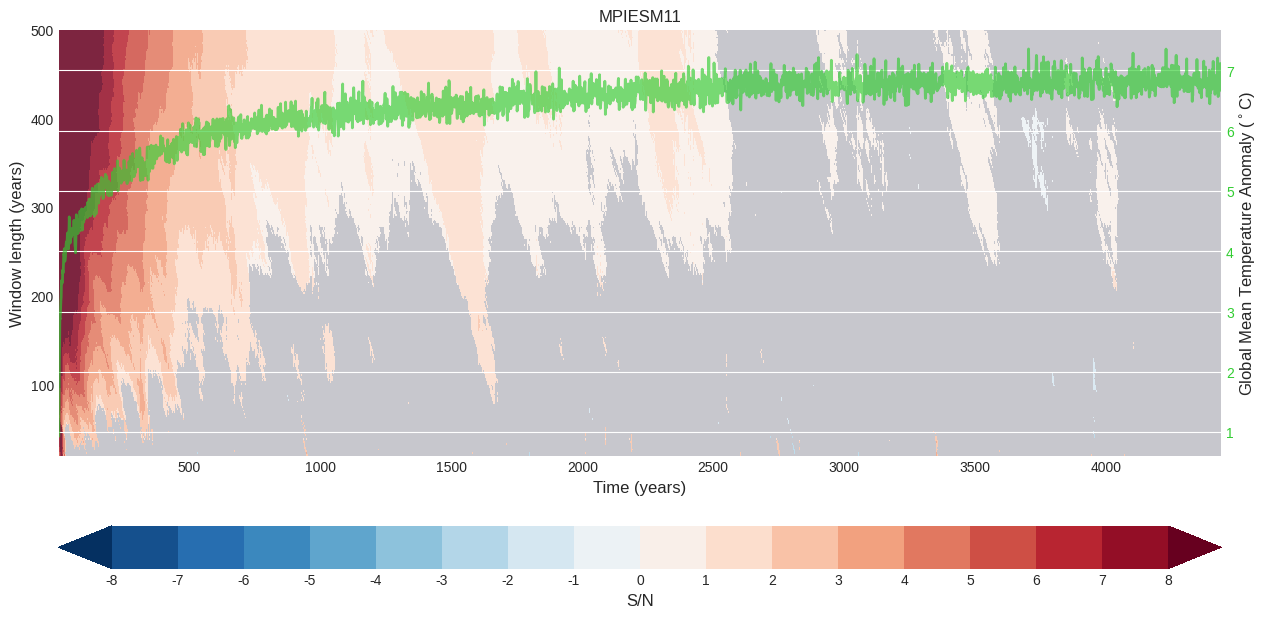

In [38]:
sn_plot.sn_multi_window_in_time(unstable_sn_multi_window_da['signal_to_noise'], 
                            stable_sn_multi_window_da['signal_to_noise'],
                            abrupt_anom_smean, title=model, step=1);
ax.set_xlim([0,4500])
# fig.savefig(f'{IMG_DIR}/{notebook_number}_{model}_SN_multi_window_long_small_step.png', dpi=400, bbox_inches='tight')